<a href="https://colab.research.google.com/github/mohammadsjahanbakhsh/ML_course/blob/main/mutual_cov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_url = "https://raw.githubusercontent.com/emanhamed/Houses-dataset/master/Houses%20Dataset/HousesInfo.txt"
columns = ["bedroom", "bathroom", "area", "zipcodes", "price"]
df = pd.read_csv(file_url, sep=" ", names=columns)
df

,bedroom,bathroom,area,zipcodes,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [ ]:
import seaborn as sns
df2=pd.read_csv("/content/autos.csv")
df2

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [ ]:
df2.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [ ]:
df2.select_dtypes('O')

,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
188,volvo,gas,std,sedan,rwd,front,ohc,mpfi
189,volvo,gas,turbo,sedan,rwd,front,ohc,mpfi
190,volvo,gas,std,sedan,rwd,front,ohcv,mpfi
191,volvo,diesel,turbo,sedan,rwd,front,ohc,idi


In [ ]:
X = df2.copy()
y = X.pop("price")

# Label encoding for categoricals

for col in X.select_dtypes('O'):
  X[col],_ = X[col].factorize()


discrete_features = X.dtypes == int



In [ ]:
X

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,20,0,0,4,2,0,0,109.1,188.8,...,4,141,0,3.78,3.15,9,114,5400,23,28
189,-1,20,0,1,4,2,0,0,109.1,188.8,...,4,141,0,3.78,3.15,8,160,5300,19,25
190,-1,20,0,0,4,2,0,0,109.1,188.8,...,6,173,0,3.58,2.87,8,134,5500,18,23
191,-1,20,1,1,4,2,0,0,109.1,188.8,...,6,145,5,3.01,3.40,23,106,4800,26,27


In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

In [ ]:
mi_scores

curb_weight          1.417957
horsepower           1.252627
engine_size          1.003765
highway_mpg          0.952235
city_mpg             0.857804
width                0.675865
length               0.614616
wheel_base           0.575333
make                 0.544642
bore                 0.484870
fuel_system          0.481063
peak_rpm             0.450770
stroke               0.391967
height               0.368651
num_of_cylinders     0.333249
drive_wheels         0.332922
symboling            0.227287
engine_type          0.149994
compression_ratio    0.135796
aspiration           0.087994
body_style           0.080313
fuel_type            0.048139
engine_location      0.036336
num_of_doors         0.010938
Name: MI Scores, dtype: float64

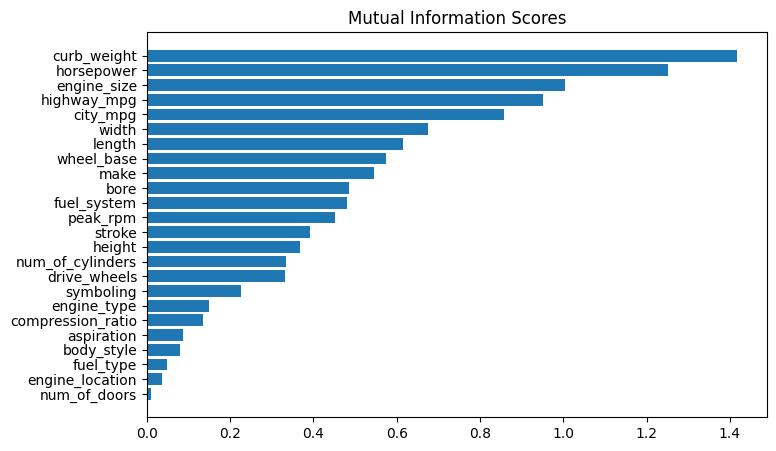

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Correlation Coefficient

![](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/diksha-q-how-to-calculate-correlation-coefficient-01-1609233340.png)

<Axes: >

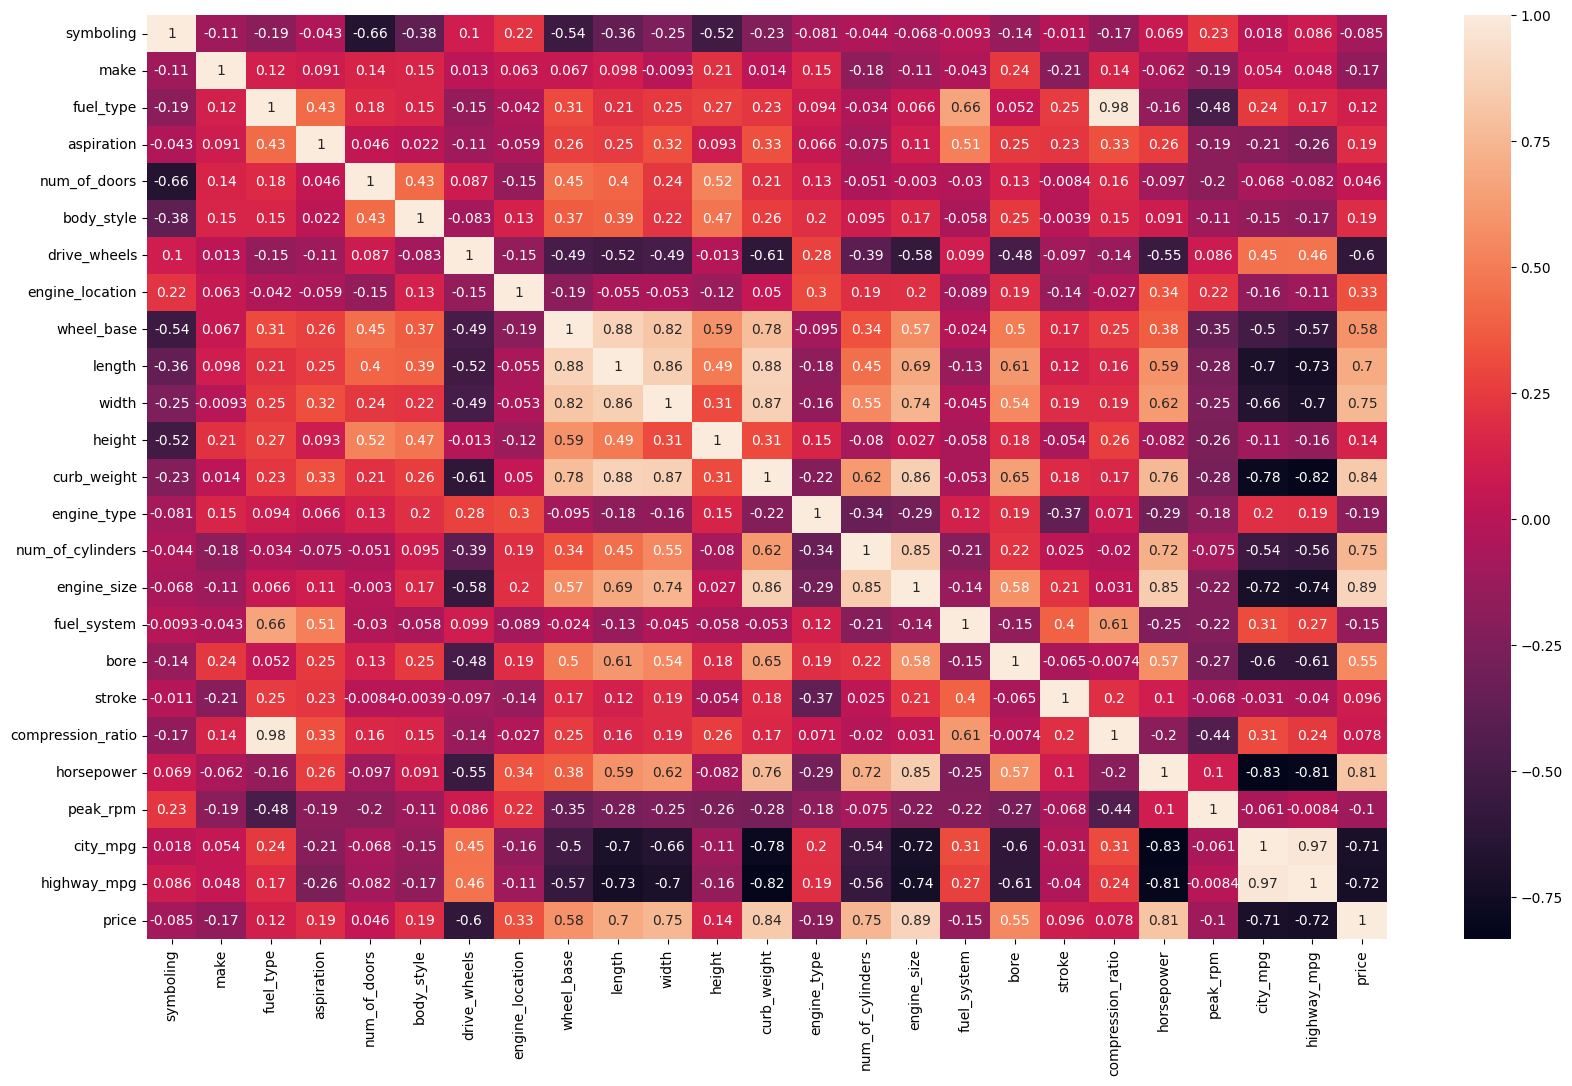

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.concat([X,y],axis=1 ).corr() , annot=True)

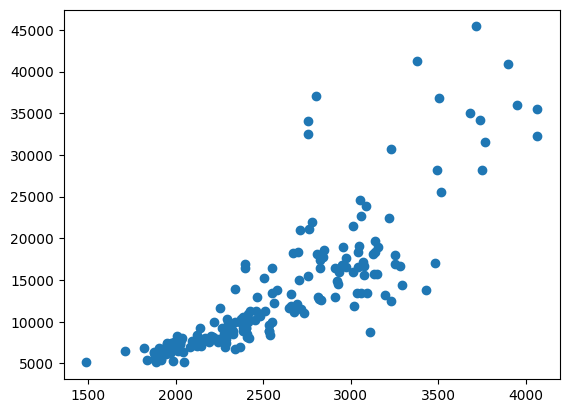

In [ ]:
plt.scatter(X.curb_weight,y)


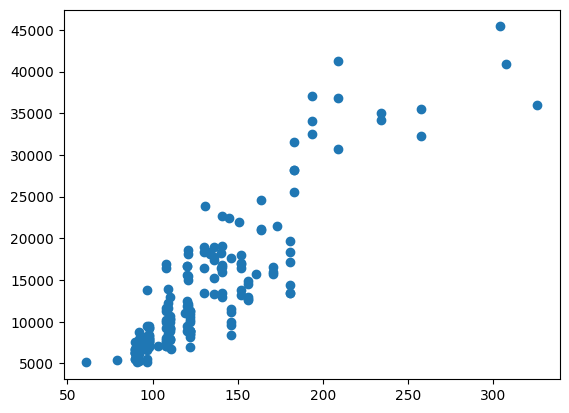

In [ ]:
plt.scatter(X.engine_size,y)

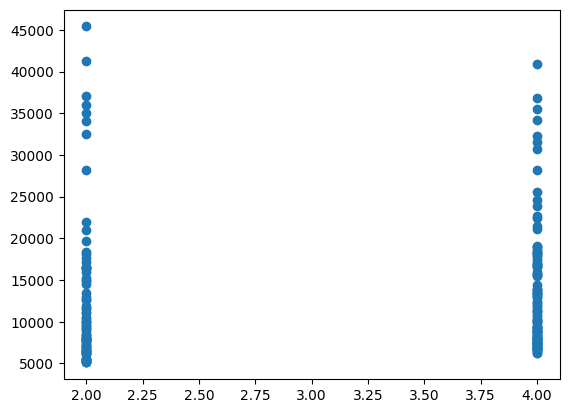

In [ ]:

plt.scatter(X.num_of_doors,y)